In [89]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from dataloader import DataLoader

from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

In [90]:
x_train, y_train, x_test, y_test, longest_graph = DataLoader('../data/test.csv',modelType='gnn', pad = True, fiftyfifty=True).getData()

/Users/aidan/Documents/caterpillar/model


[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not removing hydrogen atom without neighbors
[21:23:36] WARNING: not r

/Users/aidan/Documents/caterpillar/model


[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not removing hydrogen atom without neighbors
[21:23:37] WARNING: not r

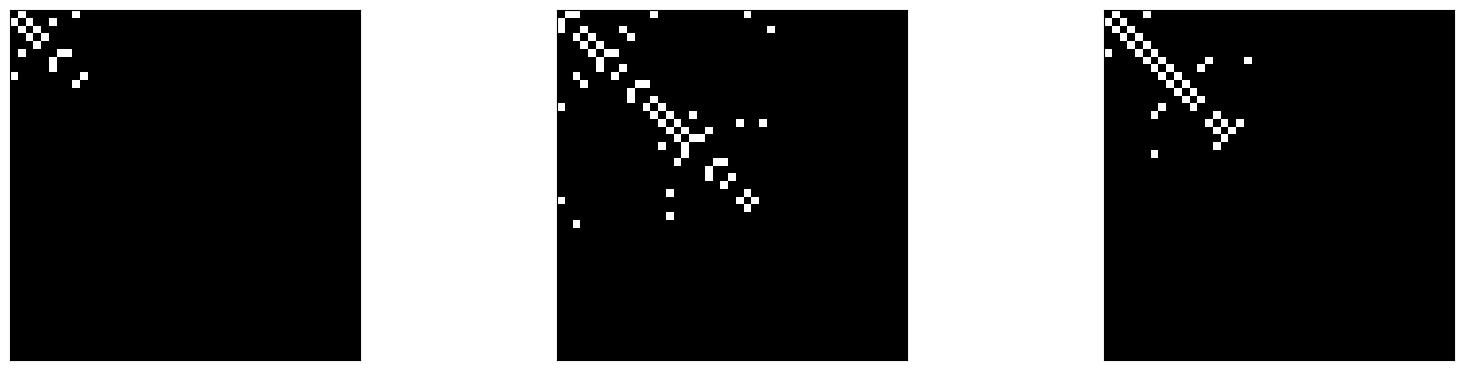

In [91]:
n = 3
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [92]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(45*45, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(500, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(500, activation='sigmoid'),
            layers.Dense(1000, activation='sigmoid'),
            layers.Dense(45*45, activation='sigmoid'),
            layers.Reshape((45, 45))
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [93]:
def removeDiagonal(adj_matrix):
    #print(adj_matrix)
    for i in range(len(adj_matrix)):
        try:
            adj_matrix[i][i+1] = 0
        except:
            print("IndexError")
        try:
            adj_matrix[i+1][i] = 0
        except:
            print("Index Error")
    return adj_matrix
vfunc = np.vectorize(removeDiagonal)

In [94]:
x_train[0]

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [95]:
x_train = np.asarray(x_train)
x_train = x_train.astype('float32')
x_test = np.asarray(x_test)
x_test = x_test.astype('float32')
for i in range(len(x_train)):
    x_train[i] = removeDiagonal(x_train[i])
for i in range(len(x_test)):
    x_test[i] = removeDiagonal(x_test[i])

IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError


In [96]:
autoencoder = Autoencoder(latent_dim = 150)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(x_train, x_train, ## TODO: FIX THIS, SOMETHING ABOUT X_TRAIN FORMAT WRONG
                epochs=40,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
23/23 [==============================] - 4s 99ms/step - loss: 0.0319 - val_loss: 0.0077
Epoch 2/40
23/23 [==============================] - 2s 82ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 3/40
23/23 [==============================] - 2s 82ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 4/40
23/23 [==============================] - 2s 81ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 5/40
23/23 [==============================] - 2s 79ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 6/40
23/23 [==============================] - 2s 84ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 7/40
23/23 [==============================] - 2s 81ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 8/40
23/23 [==============================] - 2s 79ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 9/40
23/23 [==============================] - 2s 78ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 10/40
23/23 [==============================] - 2s 79ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 11/

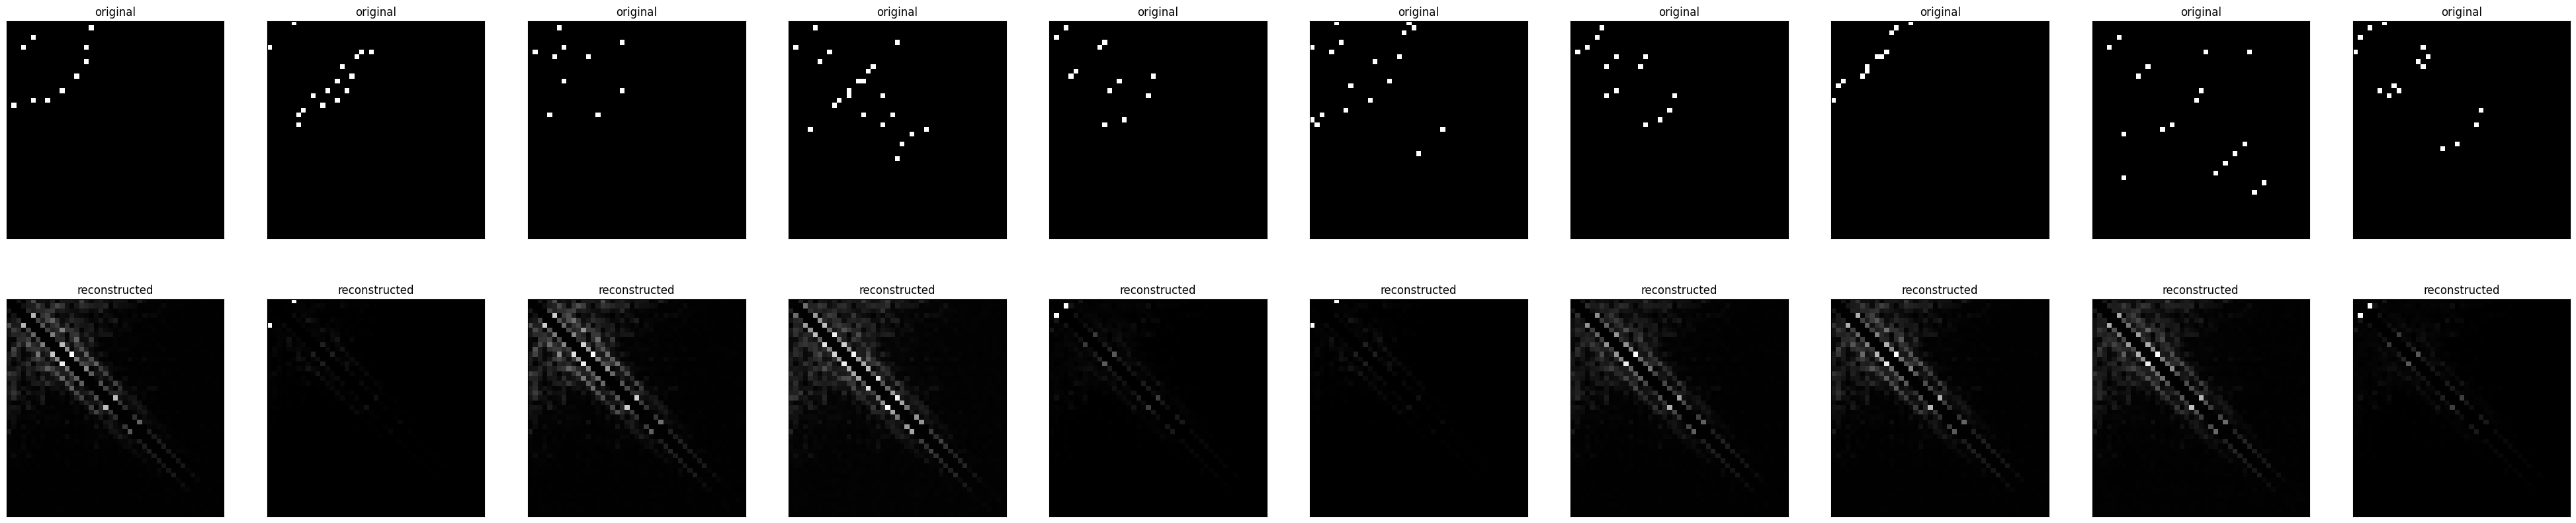

In [97]:
# Visualization cell
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

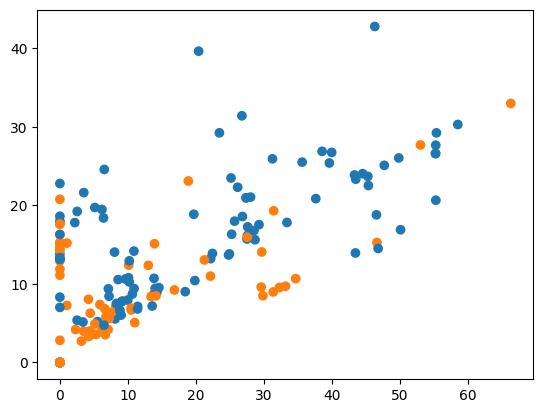

In [98]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],color=["C"+str(i) for i in y_test])

In [99]:
# Classifier
classifier = tf.keras.Sequential([
    layers.Dense(150, activation = 'relu'),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [100]:
classifier_train = autoencoder.encoder(x_train).numpy()
classifier_test = autoencoder.encoder(x_test).numpy()
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [101]:
classifier.compile(optimizer='adam', loss='binary_crossentropy')
classifier.fit(classifier_train, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.8021
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6694
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5914
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6029
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5870
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5758
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5697
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6277
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5878
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5930
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5805
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5685
Epoch 13/50
23/23 [==============================

In [102]:
y_hat = classifier.predict(classifier_test)
#print(y_hat)
right = 0
for i in range(len(y_hat)):
    t = 0
    if y_hat[i] > 0.5:
        t = 1
    if t == y_test[i]:
        right += 1
print(right/len(y_test))

6/6 [==============================] - 0s 2ms/step
0.6685082872928176
